In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../news/scraping_result/kr/2020_down2/2020_down2_(KR)Hankyung.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/kr/2020_down2/2020_down2_(KR)Tokenpost.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/kr/2020_down2/2020_down2_(KR)BlockMedia.csv', error_bad_lines=False))


In [2]:
data.loc[data['main article']=="Provided by Coinness",'main article'] = data.loc[data['main article']=="Provided by Coinness",'abstract']
data.loc[data['main article']=="Provided by 코인니스",'main article'] = data.loc[data['main article']=="Provided by 코인니스",'abstract']
data.loc[data['main article']=="",'main article'] = data.loc[data['main article']=="",'abstract']
# data.loc[data['main article']=='Provided by 코인니스','abstract']

In [3]:
text = data[['main article']].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\xa0",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)




In [4]:
from konlpy.tag import Mecab
mecab = Mecab()
text['main token article'] = text.apply(lambda row: mecab.morphs(row['main article']), axis=1)

In [5]:
text['main article']

0     \n\n\n\n\n사진=게티이미지뱅크\n\n                      ...
0     2018년 5월 정식 출시된 UBCI는 업비트 투자자가 시장 흐름을 쉽게 확인할 수...
1     이는 최근 며칠 비트코인 가격이 크게 상승, 미디어와 업계에서 새로운 희망으로 과대...
2     코인데스크에 따르면 크로아티아 금융당국 Hanfa가 지난주 목요일(현지시간) 비트코...
3     이어 비트코인에 대한 일반적인 견해들로 통화, 디지털 금, 거품, 가치 없음 등이 ...
4     8일 오후 5시 7분 암호화폐 시장은 상승세를 보이고 있다. 비트코인은 큰 상승세를...
5     유투데이에 따르면 모건크릭디지털 공동 설립자 Jason A. Williams가 '비...
6     해당 데이터는 데리비트, 렛저엑스, 백트, OKEx, CME 등 마켓의 비트코인 옵...
7     BTC가 단기 상승세를 나타내며 1만 달러를 일시 회복했다. [크립토 '공포·탐욕 ...
8     대표적인 비트코인 회의론자 '닥터 둠' 누리엘 루비니(Nouriel Roubini)...
9     @Cryptanzee는 예전에도 비트멕스 CEO를 사칭, "현재 비트코인은 너무 비...
10    암호화폐 회의론자이자 금 투자 옹호론자 피터 시프(Peter Schiff)가 10일...
11    암호화폐 전문 미디어 데일리호들이 암호화폐 데이터 플랫폼 코인댄스의 데이터를 인용 ...
12    미국 시장조사기관 IDC는 최신 보고서에서 유럽 기업의 블록체인 개발 지출 전망을 ...
13    ... 애널리스트 윌리 우(Willy Woo)가 "피터 시프(암호화폐 회의론자이자 ...
14    비트코인 반감기는 희소성을 보장하며, 향후 몇 년간 가장 지배적인 통화 형태가 될 ...
15    ... 지수는 유동성(25%), 거래량(25%), SNS 언급량(15%), 설문조사...
16    그중 바이낸스가 2320만 명을 기록하며 4월 암호화폐 거래소 중 가장 많은

In [6]:
# 소문자 적용 , - 문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word.replace("-","") for word in x])
# 공백문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word for word in x if word])

In [7]:
text['pos tag'] = text.apply(lambda row: mecab.pos(row['main article']), axis=1)

In [8]:
text['pos tag']

0     [(사진, NNG), (=, SY), (게티, NNP), (이미지, NNP), (뱅...
0     [(2018, SN), (년, NNBC), (5, SN), (월, NNBC), (정...
1     [(이, NP), (는, JX), (최근, NNG), (며칠, NNG), (비트코인...
2     [(코인, NNG), (데스크, NNG), (에, JKB), (따르, VV), (면...
3     [(이, MM), (어, IC), (비트코인, NNP), (에, JKB), (대한,...
4     [(8, SN), (일, NNBC), (오후, NNG), (5, SN), (시, N...
5     [(유, NNP), (투데이, NNP), (에, JKB), (따르, VV), (면,...
6     [(해당, NNG), (데이터, NNG), (는, JX), (데리, NNP), (비...
7     [(BTC, SL), (가, JKS), (단기, NNG), (상승세, NNG), (...
8     [(대표, NNG), (적, XSN), (인, VCP+ETM), (비트코인, NNP...
9     [(@, SY), (Cryptanzee, SL), (는, JX), (예전, NNG)...
10    [(암호, NNG), (화폐, NNG), (회의, NNG), (론, XSN), (자...
11    [(암호, NNG), (화폐, NNG), (전문, NNG), (미디어, NNG), ...
12    [(미국, NNP), (시장, NNG), (조사, NNG), (기관, NNG), (...
13    [(..., SY), (애널리스트, NNG), (윌리, NNP), (우, NNG),...
14    [(비트코인, NNP), (반감기, NNG), (는, JX), (희소성, NNG),...
15    [(..., SY), (지수, NNG), (는, JX), (유동, NNG), (성,...
16    [(그, MM), (중, NNB), (바이, MAG), (낸스, NNP), 

In [9]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('JKS','JX','JKO','JKB','EC','EP','SN','EP+EC','VV+ETM')])

In [10]:
text['main article']

0     [사진, =, 게티, 이미지, 뱅크, 대표, 상자, 산, (, 암호, 화폐, ), ...
0     [년, 월, 정식, 출시, 된, UBCI, 업, 비트, 투자자, 시장, 흐름, 쉽,...
1     [이, 최근, 며칠, 비트코인, 가격, 크, 상승, ,, 미디어, 와, 업계, 새로...
2     [코인, 데스크, 따르, 크로아티아, 금융, 당국, Hanfa, 지난주, 목요일, ...
3     [이, 어, 비트코인, 일반, 적, 인, 견해, 들, 통화, ,, 디지털, 금, ,...
4     [일, 오후, 시, 분, 암호, 화폐, 시장, 상승세, 보이, 있, 다, ., 비트...
5     [유, 투데이, 따르, 모건, 크릭, 디지털, 공동, 설립자, Jason, A, ....
6     [해당, 데이터, 데리, 비트, ,, 렛, 저, 엑스, ,, 백트, ,, OKEx,...
7     [BTC, 단기, 상승세, 나타내, 만, 달러, 일시, 회복, 했, 다, ., [,...
8     [대표, 적, 인, 비트코인, 회의, 론, 자, ', 닥터, 둠, ', 누리엘, 루...
9     [@, Cryptanzee, 예전, 비트, 멕스, CEO, 사칭, ,, ", 현재,...
10    [암호, 화폐, 회의, 론, 자, 이, 금, 투자, 옹호, 론, 자, 피터, 시프,...
11    [암호, 화폐, 전문, 미디어, 데일, 리호, 들, 암호, 화폐, 데이터, 플랫, ...
12    [미국, 시장, 조사, 기관, IDC, 최신, 보고서, 유럽, 기업, 의, 블록체인...
13    [..., 애널리스트, 윌리, 우, (, Willy, Woo, ), ", 피터, 시...
14    [비트코인, 반감기, 희소성, 보장, 하, ,, 향후, 몇, 년, 간, 가장, 지배...
15    [..., 지수, 유동, 성, (, %),, 거래량, (, %),, SNS, 급량,...
16    [그, 중, 바이, 낸스, 만, 명, 기록, 하, 월, 암호, 화폐, 거래소

In [11]:
import csv
stopword_list =[]
f = open('../../stopword/stop_ko.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

In [12]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 1])
print(tokenized_doc)
#tokenized_doc = text['main article']
#tokenized_doc

0     [사진, 게티, 이미지, 뱅크, 대표, 상자, 암호, 화폐, 비트코인, 연중, 최고...
0     [정식, 출시, UBCI, 비트, 투자자, 시장, 흐름, 확인, 설계, 국내, 최초...
1     [최근, 며칠, 비트코인, 가격, 상승, 미디어, 업계, 새로운, 희망, 과대광고,...
2     [코인, 데스크, 따르, 크로아티아, 금융, 당국, Hanfa, 지난주, 목요일, ...
3     [비트코인, 일반, 견해, 통화, 디지털, 거품, 가치, 부연, Provided, ...
4     [오후, 암호, 화폐, 시장, 상승세, 보이, 비트코인, 상승세, 보이, 오전, 달...
5     [투데이, 따르, 모건, 크릭, 디지털, 공동, 설립자, Jason, William...
6     [해당, 데이터, 데리, 비트, 엑스, 백트, OKEx, CME, 마켓, 비트코인,...
7     [BTC, 단기, 상승세, 나타내, 달러, 일시, 회복, 공포, 탐욕, 지수, .....
8     [대표, 비트코인, 회의, 닥터, 누리엘, 루비니, Nouriel, Roubini,...
9     [Cryptanzee, 예전, 비트, 멕스, CEO, 사칭, 현재, 비트코인, 너무...
10    [암호, 화폐, 회의, 투자, 옹호, 피터, 시프, Peter, Schiff, 현지...
11    [암호, 화폐, 전문, 미디어, 데일, 리호, 암호, 화폐, 데이터, 플랫, 코인,...
12    [미국, 시장, 조사, 기관, IDC, 최신, 보고서, 유럽, 기업, 블록체인, 개...
13    [..., 애널리스트, 윌리, Willy, Woo, 피터, 시프, 암호, 화폐, 회...
14    [비트코인, 반감기, 희소성, 보장, 향후, 가장, 지배, 통화, 형태, 설명, P...
15    [..., 지수, 유동, %),, 거래량, %),, SNS, 급량, %),, 설문,...
16    [바이, 낸스, 기록, 암호, 화폐, 거래소, 가장, 트래픽, 나타냈, 비트

In [13]:
article_contents = tokenized_doc.values.tolist()

In [14]:
len(tokenized_doc)

27

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [16]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [17]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [18]:
# article_contents_tfidf

In [19]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [20]:
word2id = defaultdict(lambda: 0)

In [21]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [22]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [23]:
len(tf_idf_result)

859

In [24]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

859


In [25]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [26]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.003*"계획" + 0.003*"데일" + 0.003*"오비" + 0.003*"투명" + 0.003*"하락" + 0.003*"의견" + 0.003*"모건" + 0.003*"개선"')
(1, '0.003*"승인" + 0.003*"악의" + 0.003*"덧붙였" + 0.003*"체계" + 0.003*"장중" + 0.003*"연초" + 0.003*"베트남" + 0.003*"때문"')
(2, '0.003*"시프" + 0.003*"헤지" + 0.003*"캐시" + 0.003*"기준" + 0.003*"숙원" + 0.003*"했으며" + 0.003*"오전" + 0.003*"채용"')
(3, '0.003*"동일" + 0.003*"탐욕" + 0.003*"현금" + 0.003*"하루" + 0.003*"높여" + 0.003*"만드" + 0.003*"기사" + 0.003*"거래"')


In [27]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [28]:
sentences = article_contents

In [29]:
length1 = 0
for setence in sentences :
    length1 += len(setence) 
length1

2231

In [30]:
from gensim.models import Word2Vec

In [31]:
model = Word2Vec(sentences, min_count=1)

In [32]:
len(model.wv.vocab)

859

In [33]:
# model.wv.vocab

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict


In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

859

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

851.3471184920238

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

0.8663463087220009

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.02719290613550682

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
len(tf_idf_value)

859

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
856,"[0.004244538024067879, -0.0033438359387218952,...",Weekly,0,"[2.6321819e-05, -0.000872601, 0.0003008468, -0...",0.565772,0.013373,1.552399,NaN
69,"[0.002825370291247964, 0.0006832751096226275, ...",디지털,0,"[2.6321819e-05, -0.000872601, 0.0003008468, -0...",0.763930,0.173852,1.590078,NaN
418,"[0.004501860123127699, 0.0019078543409705162, ...",개월,0,"[2.6321819e-05, -0.000872601, 0.0003008468, -0...",0.634502,0.013373,1.621129,NaN
793,"[0.001572366338223219, -0.0030256633181124926,...",Messari,0,"[2.6321819e-05, -0.000872601, 0.0003008468, -0...",0.639264,0.013373,1.625891,NaN
368,"[0.0014734423020854592, -0.003328329185023904,...",기술,0,"[2.6321819e-05, -0.000872601, 0.0003008468, -0...",0.720909,0.066866,1.654043,NaN
842,"[0.0013772983802482486, 0.0022734315134584904,...",기초,0,"[2.6321819e-05, -0.000872601, 0.0003008468, -0...",0.673168,0.006687,1.666481,NaN
323,"[0.0008837952627800405, 0.00220594578422606, -...",니스,0,"[2.6321819e-05, -0.000872601, 0.0003008468, -0...",0.719094,0.046806,1.672288,NaN
433,"[0.0021061873994767666, 0.0009518945589661598,...",메인,0,"[2.6321819e-05, -0.000872601, 0.0003008468, -0...",0.721410,0.046806,1.674604,NaN
247,"[-0.004399369470775127, -0.003369273617863655,...",BTC,0,"[2.6321819e-05, -0.000872601, 0.0003008468, -0...",0.700913,0.013373,1.687540,NaN
59,"[-0.0050337729044258595, -0.002254241378977894...",가격,0,"[2.6321819e-05, -0.000872601, 0.0003008468, -0...",0.743001,0.053493,1.689508,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
7,"[-0.00463771540671587, 0.000399526150431484, 0...",화폐,1,"[-3.9008137e-05, 0.00041138782, -0.0012665044,...",0.709298,0.287524,1.421774,NaN
6,"[0.0015455173561349511, 0.001045370940119028, ...",암호,1,"[-3.9008137e-05, 0.00041138782, -0.0012665044,...",0.699009,0.274151,1.424858,NaN
344,"[-0.0010266270255669951, -0.000701607728842645...",달러,1,"[-3.9008137e-05, 0.00041138782, -0.0012665044,...",0.834360,0.287524,1.546835,NaN
65,"[0.001413822639733553, 0.00251222332008183, -0...",당장,1,"[-3.9008137e-05, 0.00041138782, -0.0012665044,...",0.557509,0.006687,1.550822,NaN
175,"[0.003020989242941141, -0.0027671169955283403,...",비트,1,"[-3.9008137e-05, 0.00041138782, -0.0012665044,...",0.739898,0.187225,1.552673,NaN
127,"[-0.00416072690859437, 0.00122661457862705, -0...",업체,1,"[-3.9008137e-05, 0.00041138782, -0.0012665044,...",0.620198,0.053493,1.566706,NaN
257,"[-0.004759489092975855, -0.002413175068795681,...",기록,1,"[-3.9008137e-05, 0.00041138782, -0.0012665044,...",0.740143,0.147105,1.593038,NaN
25,"[-0.005353261716663837, -0.004306783899664879,...",자산,1,"[-3.9008137e-05, 0.00041138782, -0.0012665044,...",0.785330,0.180538,1.604791,NaN
825,"[-0.0029352332931011915, -0.002021875465288758...",견인,1,"[-3.9008137e-05, 0.00041138782, -0.0012665044,...",0.642510,0.006687,1.635824,NaN
525,"[0.002819485729560256, 0.0043818289414048195, ...",면접,1,"[-3.9008137e-05, 0.00041138782, -0.0012665044,...",0.664311,0.006687,1.657624,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
285,"[0.0016699853586032987, 0.004780629184097052, ...",블록체인,2,"[-0.00044979024, 0.0005234492, 0.00025103375, ...",0.688956,0.160479,1.528477,NaN
454,"[-0.004230097401887178, 0.0034254207275807858,...",침해,2,"[-0.00044979024, 0.0005234492, 0.00025103375, ...",0.549822,0.006687,1.543135,NaN
234,"[-0.002187647856771946, 0.0038175450172275305,...",인덱스,2,"[-0.00044979024, 0.0005234492, 0.00025103375, ...",0.753024,0.167165,1.585859,NaN
31,"[-0.0017850238364189863, -0.002751013729721307...",시간,2,"[-0.00044979024, 0.0005234492, 0.00025103375, ...",0.673768,0.086926,1.586842,NaN
271,"[-0.003576271003112197, 0.00010571963503025472...",상승,2,"[-0.00044979024, 0.0005234492, 0.00025103375, ...",0.788189,0.187225,1.600964,NaN
347,"[-0.004100841470062733, 0.004693377763032913, ...",전날,2,"[-0.00044979024, 0.0005234492, 0.00025103375, ...",0.706493,0.073553,1.632940,NaN
153,"[0.0012019985588267446, -0.0001949237921508029...",시스템,2,"[-0.00044979024, 0.0005234492, 0.00025103375, ...",0.711411,0.073553,1.637859,NaN
321,"[-0.0015236539766192436, -5.876980867469683e-0...",비판,2,"[-0.00044979024, 0.0005234492, 0.00025103375, ...",0.666369,0.013373,1.652995,NaN
279,"[-0.004424458835273981, 0.003233328927308321, ...",코인,2,"[-0.00044979024, 0.0005234492, 0.00025103375, ...",0.810514,0.153792,1.656722,NaN
88,"[-0.00026194998645223677, 0.003072449704632163...",ISMS,2,"[-0.00044979024, 0.0005234492, 0.00025103375, ...",0.671272,0.013373,1.657899,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
8,"[-0.0025461188051849604, 0.004375642631202936,...",비트코인,3,"[0.00020219859, 0.00033804198, -0.00023014379,...",0.707020,0.407883,1.299137,NaN
51,"[0.00011867527791764587, -0.002180861076340079...",시장,3,"[0.00020219859, 0.00033804198, -0.00023014379,...",0.769456,0.140419,1.629038,NaN
325,"[0.0014407060807570815, -0.0028179562650620937...",따르,3,"[0.00020219859, 0.00033804198, -0.00023014379,...",0.707763,0.073553,1.634210,NaN
260,"[-0.0038930452428758144, -0.003578253788873553...",나타났,3,"[0.00020219859, 0.00033804198, -0.00023014379,...",0.671309,0.033433,1.637876,NaN
171,"[0.0030562926549464464, 0.0034819496795535088,...",테러,3,"[0.00020219859, 0.00033804198, -0.00023014379,...",0.655929,0.006687,1.649242,NaN
265,"[4.940107828588225e-05, -0.004509963560849428,...",하락,3,"[0.00020219859, 0.00033804198, -0.00023014379,...",0.737630,0.080239,1.657390,NaN
429,"[-0.0023555303923785686, 0.003695120569318533,...",스케일,3,"[0.00020219859, 0.00033804198, -0.00023014379,...",0.667291,0.006687,1.660605,NaN
48,"[0.002144585130736232, 0.0006132053676992655, ...",미국,3,"[0.00020219859, 0.00033804198, -0.00023014379,...",0.716748,0.046806,1.669941,NaN
630,"[-0.004166273400187492, -0.0011087879538536072...",경신,3,"[0.00020219859, 0.00033804198, -0.00023014379,...",0.695610,0.020060,1.675550,NaN
246,"[0.0006453397800214589, -0.0027155273128300905...",결과,3,"[0.00020219859, 0.00033804198, -0.00023014379,...",0.696023,0.020060,1.675963,NaN


In [56]:
y_km = temp_cluster_result['cluster'].values

In [57]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

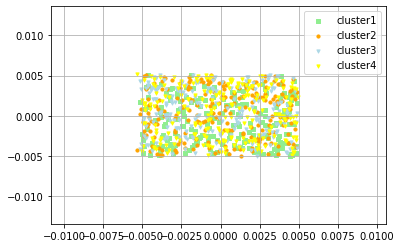

In [58]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 기술

217

In [64]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

215

In [65]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 이슈

209

In [66]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 거래소돈

218

In [67]:
temp_cluster_result['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [68]:
temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [69]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 9 # 기술

In [70]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 11 #  투자

In [71]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 5 #  이슈

In [72]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 12 # 가격,거래소

In [73]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [74]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [75]:
kmeans.inertia_

0.6997643113136292

In [76]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 3 2 1 0 0 2 0 3 1 0 3 1 2 0 3 3 2 3 2 0 3 1 2 0 2 2 3 0 2 1 1 2 0 1 0 2
 3 3 2 2 0 3 0 0 2 3 2 1 3 3 2 1 0 0 1 2 1 0 0 2 1 0 0 2 2 3 1 2 0 0 0 1 3
 1 2 1 0 0 2 3 0 2 0 3 2 0 2 2 1 2 3 3 1 2 2 0 0 3 1 2 3 1 3 0 3 2 2 2 2 1
 0 1 3 2 0 0 2 2 0 3 0 0 0 2 0 3 2 3 1 1 0 0 0 3 1 3 2 3 1 0 0 3 0 1 1 0 0
 3 2 0 1 3 1 0 3 0 2 1 1 0 3 0 1 0 0 1 0 1 0 0 3 3 0 1 1 0 0 0 1 2 1 3 3 3
 1 2 0 3 2 2 2 0 0 0 3 1 2 2 3 2 2 2 0 1 2 2 0 3 2 2 2 1 1 0 0 3 2 3 3 1 1
 1 0 1 1 3 2 3 0 2 0 0 2 1 3 1 0 0 1 3 0 2 0 1 2 3 1 2 3 2 3 3 3 1 3 2 2 3
 3 3 2 2 1 1 1 2 0 0 0 1 0 2 2 3 3 1 1 0 1 1 2 3 2 0 1 1 3 2 2 2 1 1 1 0 0
 2 2 1 0 1 2 1 3 3 0 2 0 3 0 1 2 1 2 0 3 1 1 3 2 2 1 3 1 0 1 1 0 3 1 0 3 0
 3 0 2 3 1 1 1 3 2 1 0 0 0 3 0 1 3 0 0 3 3 0 3 0 1 3 0 3 0 2 2 0 0 3 3 0 3
 1 3 0 3 2 0 2 1 1 0 1 3 3 1 0 2 2 2 2 1 0 2 2 1 1 1 3 3 2 1 1 0 1 1 2 1 0
 1 0 3 2 1 3 3 0 3 0 0 1 0 2 3 2 3 2 2 3 2 1 3 2 3 3 0 0 0 3 0 2 3 3 0 0 2
 0 3 0 1 1 3 3 3 0 1 1 3 1 1 1 2 3 0 2 2 2 3 2 3 2 2 1 3 0 2 0 2

In [77]:
cluster_values= list(model.wv.vocab)

In [78]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-0.6997642517089844


In [79]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [80]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.009394376


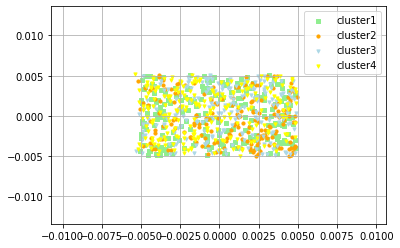

In [81]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [83]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [84]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [85]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [86]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [87]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [88]:
import scipy.spatial.distance as dist

In [89]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [90]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [91]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
344,"[-0.0010266270255669951, -0.000701607728842645...",달러,0,"[-0.00022461843, -9.916137e-05, 0.00013977951,...",0.028178,0.287524,0.740654,NaN
7,"[-0.00463771540671587, 0.000399526150431484, 0...",화폐,0,"[-0.00022461843, -9.916137e-05, 0.00013977951,...",0.028603,0.287524,0.741079,NaN
271,"[-0.003576271003112197, 0.00010571963503025472...",상승,0,"[-0.00022461843, -9.916137e-05, 0.00013977951,...",0.028916,0.187225,0.841691,NaN
69,"[0.002825370291247964, 0.0006832751096226275, ...",디지털,0,"[-0.00022461843, -9.916137e-05, 0.00013977951,...",0.027302,0.173852,0.853451,NaN
121,"[-0.001876945374533534, 0.005120816640555859, ...",한다,0,"[-0.00022461843, -9.916137e-05, 0.00013977951,...",0.030449,0.093613,0.936836,NaN
178,"[0.0043070148676633835, -0.003365111071616411,...",거래소,0,"[-0.00022461843, -9.916137e-05, 0.00013977951,...",0.028883,0.080239,0.948644,NaN
347,"[-0.004100841470062733, 0.004693377763032913, ...",전날,0,"[-0.00022461843, -9.916137e-05, 0.00013977951,...",0.029110,0.073553,0.955557,NaN
4,"[-0.0034131675492972136, -0.004599861335009336...",대표,0,"[-0.00022461843, -9.916137e-05, 0.00013977951,...",0.030821,0.073553,0.957269,NaN
156,"[0.0017421104712411761, 0.004861081950366497, ...",거래,0,"[-0.00022461843, -9.916137e-05, 0.00013977951,...",0.027605,0.066866,0.960739,NaN
368,"[0.0014734423020854592, -0.003328329185023904,...",기술,0,"[-0.00022461843, -9.916137e-05, 0.00013977951,...",0.029286,0.066866,0.962420,NaN


In [92]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 거래소 돈 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
175,"[0.003020989242941141, -0.0027671169955283403,...",비트,1,"[0.00075731816, -0.00056883006, -0.00035448678...",0.029201,0.187225,0.841976,NaN
234,"[-0.002187647856771946, 0.0038175450172275305,...",인덱스,1,"[0.00075731816, -0.00056883006, -0.00035448678...",0.029093,0.167165,0.861928,NaN
285,"[0.0016699853586032987, 0.004780629184097052, ...",블록체인,1,"[0.00075731816, -0.00056883006, -0.00035448678...",0.029630,0.160479,0.869151,NaN
279,"[-0.004424458835273981, 0.003233328927308321, ...",코인,1,"[0.00075731816, -0.00056883006, -0.00035448678...",0.030369,0.153792,0.876577,NaN
31,"[-0.0017850238364189863, -0.002751013729721307...",시간,1,"[0.00075731816, -0.00056883006, -0.00035448678...",0.028199,0.086926,0.941273,NaN
89,"[-0.0034567934926599264, 0.0033207007218152285...",인증,1,"[0.00075731816, -0.00056883006, -0.00035448678...",0.030649,0.086926,0.943723,NaN
265,"[4.940107828588225e-05, -0.004509963560849428,...",하락,1,"[0.00075731816, -0.00056883006, -0.00035448678...",0.027970,0.080239,0.947730,NaN
153,"[0.0012019985588267446, -0.0001949237921508029...",시스템,1,"[0.00075731816, -0.00056883006, -0.00035448678...",0.027304,0.073553,0.953751,NaN
325,"[0.0014407060807570815, -0.0028179562650620937...",따르,1,"[0.00075731816, -0.00056883006, -0.00035448678...",0.027815,0.073553,0.954262,NaN
270,"[0.00424339110031724, 0.0006744340062141418, -...",가장,1,"[0.00075731816, -0.00056883006, -0.00035448678...",0.028046,0.073553,0.954493,NaN


In [93]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
6,"[0.0015455173561349511, 0.001045370940119028, ...",암호,2,"[0.00022277827, 0.0005372131, -0.0009845514, -...",0.028607,0.274151,0.754456,NaN
25,"[-0.005353261716663837, -0.004306783899664879,...",자산,2,"[0.00022277827, 0.0005372131, -0.0009845514, -...",0.030278,0.180538,0.849739,NaN
257,"[-0.004759489092975855, -0.002413175068795681,...",기록,2,"[0.00022277827, 0.0005372131, -0.0009845514, -...",0.030239,0.147105,0.883134,NaN
51,"[0.00011867527791764587, -0.002180861076340079...",시장,2,"[0.00022277827, 0.0005372131, -0.0009845514, -...",0.028144,0.140419,0.887725,NaN
100,"[0.0006501725874841213, 0.001521922997198999, ...",분석,2,"[0.00022277827, 0.0005372131, -0.0009845514, -...",0.027654,0.093613,0.934041,NaN
242,"[-0.004887477494776249, -0.002482928102836013,...",통해,2,"[0.00022277827, 0.0005372131, -0.0009845514, -...",0.029170,0.060179,0.968990,NaN
485,"[-0.001924065756611526, 0.004488828592002392, ...",채용,2,"[0.00022277827, 0.0005372131, -0.0009845514, -...",0.027346,0.053493,0.973853,NaN
127,"[-0.00416072690859437, 0.00122661457862705, -0...",업체,2,"[0.00022277827, 0.0005372131, -0.0009845514, -...",0.027961,0.053493,0.974468,NaN
404,"[0.00039802835090085864, -0.004715219140052795...",데이터,2,"[0.00022277827, 0.0005372131, -0.0009845514, -...",0.028896,0.053493,0.975403,NaN
13,"[-0.0005658973823301494, 0.0015664724633097649...",국내,2,"[0.00022277827, 0.0005372131, -0.0009845514, -...",0.028933,0.046806,0.982127,NaN


In [94]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
8,"[-0.0025461188051849604, 0.004375642631202936,...",비트코인,3,"[-0.0008535873, 0.00043886967, 0.00017801263, ...",0.024511,0.407883,0.616628,NaN
235,"[-0.0045439754612743855, -0.001930083846673369...",지수,3,"[-0.0008535873, 0.00043886967, 0.00017801263, ...",0.029493,0.113672,0.915821,NaN
73,"[-0.0035425308160483837, 0.0024791890755295753...",정보,3,"[-0.0008535873, 0.00043886967, 0.00017801263, ...",0.030600,0.066866,0.963733,NaN
287,"[-0.004562229383736849, 0.002824758645147085, ...",투자,3,"[-0.0008535873, 0.00043886967, 0.00017801263, ...",0.029202,0.060179,0.969022,NaN
183,"[-0.00536330183967948, 0.005196735262870789, -...",은행,3,"[-0.0008535873, 0.00043886967, 0.00017801263, ...",0.031676,0.060179,0.971497,NaN
258,"[-0.0049772802740335464, -0.003755498211830854...",가치,3,"[-0.0008535873, 0.00043886967, 0.00017801263, ...",0.029353,0.053493,0.975860,NaN
315,"[-0.002435895148664713, 0.004152424167841673, ...",최근,3,"[-0.0008535873, 0.00043886967, 0.00017801263, ...",0.029991,0.046806,0.983184,NaN
155,"[-0.001665771473199129, -0.0027085402980446815...",위해,3,"[-0.0008535873, 0.00043886967, 0.00017801263, ...",0.026990,0.040120,0.986871,NaN
255,"[-0.005164951551705599, -0.0041471198201179504...",시가총액,3,"[-0.0008535873, 0.00043886967, 0.00017801263, ...",0.027369,0.040120,0.987249,NaN
105,"[0.00015831715427339077, 0.0026640896685421467...",구축,3,"[-0.0008535873, 0.00043886967, 0.00017801263, ...",0.028150,0.040120,0.988030,NaN


In [95]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #거래소 돈

231

In [96]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #거래소 돈

190

In [97]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #비즈

213

In [98]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #투자

225

In [99]:
temp_cluster_result1['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [100]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 12 # 거래소,돈 

In [101]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 12 # 거래소,돈 

In [102]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 7 # 비즈

In [103]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 11 # 투자  

In [104]:
temp_cluster_result1

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#,category,label
0,"[0.003121719928458333, -0.001853583031333983, ...",사진,3,"[-0.0008535873, 0.00043886967, 0.00017801263, ...",0.026688,0.013373,1.013315,NaN,2,11.0
1,"[-0.0042861150577664375, -0.000904313288629055...",게티,3,"[-0.0008535873, 0.00043886967, 0.00017801263, ...",0.028648,0.006687,1.021961,NaN,2,11.0
2,"[0.0012678210623562336, 2.2590353182749823e-05...",이미지,2,"[0.00022277827, 0.0005372131, -0.0009845514, -...",0.027332,0.006687,1.020645,NaN,2,7.0
3,"[0.004362399224191904, 0.0023890784941613674, ...",뱅크,1,"[0.00075731816, -0.00056883006, -0.00035448678...",0.029438,0.013373,1.016065,NaN,2,12.0
4,"[-0.0034131675492972136, -0.004599861335009336...",대표,0,"[-0.00022461843, -9.916137e-05, 0.00013977951,...",0.030821,0.073553,0.957269,NaN,2,12.0
...,...,...,...,...,...,...,...,...,...,...
854,"[-0.004609350115060806, 0.0036972039379179478,...",월요일,2,"[0.00022277827, 0.0005372131, -0.0009845514, -...",0.027119,0.006687,1.020433,NaN,2,7.0
855,"[-0.004539160057902336, -0.00488355103880167, ...",정리,0,"[-0.00022461843, -9.916137e-05, 0.00013977951,...",0.028987,0.006687,1.022300,NaN,2,12.0
856,"[0.004244538024067879, -0.0033438359387218952,...",Weekly,0,"[-0.00022461843, -9.916137e-05, 0.00013977951,...",0.029513,0.013373,1.016139,NaN,2,12.0
857,"[-0.0006792934727855027, -0.000359244673745706...",Review,1,"[0.00075731816, -0.00056883006, -0.00035448678...",0.029695,0.013373,1.016322,NaN,2,12.0


In [105]:
temp_cluster_result1['Silhouette'] = 0.009394376
temp_cluster_result['Silhouette'] = 0.009394376

In [106]:
#temp_cluster_result1.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_euclidean.csv")
#temp_cluster_result.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_cosine.csv")

In [107]:
len(temp_cluster_result1)

859

In [108]:
len(temp_cluster_result)

859

In [109]:
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [110]:
temp_cluster_result1.to_csv("../cluster/ko_news/2020_down2/(test)_ko_news_2020_down1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/ko_news/2020_down2/(test)_ko_news_2020_down1_cosine.csv")